# Crime Rate Prediction using Linear Regression
## Analysis and Future Predictions from Google Sheets Data

### Step 1: Import Required Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow for Neural Networks
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, regularizers
    from tensorflow.keras.callbacks import EarlyStopping
    print("✅ TensorFlow imported successfully!")
    TF_AVAILABLE = True
except ImportError:
    print("⚠️ TensorFlow not available. Installing...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'tensorflow'])
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, regularizers
    from tensorflow.keras.callbacks import EarlyStopping
    TF_AVAILABLE = True

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"TensorFlow version: {tf.__version__}")


⚠️ TensorFlow not available. Installing...
✅ All libraries imported successfully!
TensorFlow version: 2.20.0
✅ All libraries imported successfully!
TensorFlow version: 2.20.0


### Step 2: Load Dataset from Google Sheets

In [46]:
print("="*50)
print("LOADING DATA FROM GOOGLE SHEETS...")
print("="*50)

# Your Google Sheets URL
SHEET_URL = "https://docs.google.com/spreadsheets/d/1Kux27qXqF6iZVfEgPGtfCks1CIvLpj8ctwkTqzuqXHg/edit?usp=sharing"

# Convert to CSV export format
sheet_id = SHEET_URL.split('/d/')[1].split('/')[0]
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"

print(f"📊 Loading from: {csv_url}")
df = pd.read_csv(csv_url)

print("\n✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

LOADING DATA FROM GOOGLE SHEETS...
📊 Loading from: https://docs.google.com/spreadsheets/d/1Kux27qXqF6iZVfEgPGtfCks1CIvLpj8ctwkTqzuqXHg/export?format=csv

✅ Dataset loaded successfully!
Shape: (9017, 33)

First few rows:
         STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0  ANDHRA PRADESH       ADILABAD  2001     101                 60   
1  ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2  ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3  ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4  ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   

   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                         17    50               0   
1                                          1    23               0   
2                                          2    27               0   
3                                          1    20               0   
4              

### Step 3: Explore Available Data

In [47]:
# Display available states and crime types
print("\n" + "="*50)
print("AVAILABLE STATES/UTs:")
print("="*50)
print(df['STATE/UT'].unique())

print("\n" + "="*50)
print("AVAILABLE CRIME TYPES:")
print("="*50)
crime_columns = [col for col in df.columns if col not in ['STATE/UT', 'DISTRICT', 'YEAR']]
for i, col in enumerate(crime_columns, 1):
    print(f"{i}. {col}")


AVAILABLE STATES/UTs:
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']

AVAILABLE CRIME TYPES:
1. MURDER
2. ATTEMPT TO MURDER
3. CULPABLE HOMICIDE NOT AMOUNTING TO MURDER
4. RAPE
5. CUSTODIAL RAPE
6. OTHER RAPE
7. KIDNAPPING & ABDUCTION
8. KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS
9. KIDNAPPING AND ABDUCTION OF OTHERS
10. DACOITY
11. PREPARATION AND ASSEMBLY FOR DACOITY
12. ROBBERY
13. BURGLARY
14. THEFT
15. AUTO THEFT
16. OTHER THEFT
17. RIOTS
18. CRIMINAL BREACH OF TRUST
19. CHEATING
20. COUNTERFIETING
21. ARSON
22. HURT/GREVIOUS HURT
23. DOWRY DEATHS
24. ASSAULT ON WOMEN WITH INTENT TO OU

### Step 4: Select State and Crime Type
**CHANGE THESE VALUES ACCORDING TO YOUR NEEDS**

In [ ]:
# Process ALL STATES and ALL CRIME TYPES with NEURAL NETWORKS (EPOCHS)
print("="*50)
print("TRAINING NEURAL NETWORK MODELS WITH EPOCHS")
print("="*50)

# Get all unique states and crime types
all_states = df['STATE/UT'].unique()
crime_columns = [col for col in df.columns if col not in ['STATE/UT', 'DISTRICT', 'YEAR']]

print(f"\n📊 Found {len(all_states)} states/UTs")
print(f"📊 Found {len(crime_columns)} crime types")
print("\n🤖 Using Neural Networks with Multiple Epochs for Better Accuracy")

# Dictionary to store all models and data
all_models = {}

# Train model for each state and crime type combination
total_combinations = len(all_states) * len(crime_columns)
current = 0

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

for state in all_states:
    for crime_type in crime_columns:
        current += 1
        if current % 50 == 0:
            print(f"Processing {current}/{total_combinations}...")
        
        try:
            # Filter and aggregate data
            state_data = df[df['STATE/UT'] == state]
            yearly_data = state_data.groupby('YEAR')[crime_type].sum().reset_index()
            yearly_data.columns = ['Year', 'Crime_Count']
            
            # Skip if insufficient data
            if len(yearly_data) < 3 or yearly_data['Crime_Count'].sum() == 0:
                continue
            
            # Prepare data
            X = yearly_data[['Year']].values
            y = yearly_data['Crime_Count'].values.reshape(-1, 1)
            
            # Normalize features for Neural Network
            scaler_X = MinMaxScaler()
            scaler_y = MinMaxScaler()
            X_scaled = scaler_X.fit_transform(X)
            y_scaled = scaler_y.fit_transform(y)
            
            # Test multiple models
            models_to_test = []
            
            # 1. Neural Network with Epochs (PRIMARY MODEL)
            if len(yearly_data) >= 5:
                # Build Neural Network
                tf.keras.backend.clear_session()
                
                nn_model = keras.Sequential([
                    layers.Dense(64, activation='relu', input_shape=(1,),
                                kernel_regularizer=regularizers.l2(0.001)),
                    layers.Dropout(0.2),
                    layers.Dense(32, activation='relu',
                                kernel_regularizer=regularizers.l2(0.001)),
                    layers.Dropout(0.2),
                    layers.Dense(16, activation='relu'),
                    layers.Dense(1)
                ])
                
                nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
                                loss='mse',
                                metrics=['mae'])
                
                # Early stopping to prevent overfitting
                early_stop = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True)
                
                # Train with epochs (suppress output)
                history = nn_model.fit(X_scaled, y_scaled, 
                                      epochs=500,
                                      batch_size=min(4, len(X_scaled)),
                                      verbose=0,
                                      callbacks=[early_stop])
                
                # Make predictions
                y_pred_scaled = nn_model.predict(X_scaled, verbose=0)
                y_pred_nn = scaler_y.inverse_transform(y_pred_scaled).flatten()
                nn_r2 = r2_score(y.flatten(), y_pred_nn)
                
                models_to_test.append(('neural_network', nn_model, nn_r2, scaler_X, scaler_y))
            
            # 2. Polynomial Regression (degree 2)
            poly2_features = PolynomialFeatures(degree=2)
            X_poly2 = poly2_features.fit_transform(X)
            poly2_model = LinearRegression()
            poly2_model.fit(X_poly2, y)
            poly2_r2 = r2_score(y, poly2_model.predict(X_poly2))
            models_to_test.append(('polynomial_2', poly2_model, poly2_r2, poly2_features, None))
            
            # 3. Polynomial Regression (degree 3) - if enough data
            if len(yearly_data) >= 5:
                poly3_features = PolynomialFeatures(degree=3)
                X_poly3 = poly3_features.fit_transform(X)
                poly3_model = LinearRegression()
                poly3_model.fit(X_poly3, y)
                poly3_r2 = r2_score(y, poly3_model.predict(X_poly3))
                models_to_test.append(('polynomial_3', poly3_model, poly3_r2, poly3_features, None))
            
            # 4. Gradient Boosting
            if len(yearly_data) >= 5:
                gb_model = GradientBoostingRegressor(n_estimators=200, max_depth=4, 
                                                     learning_rate=0.05, random_state=42)
                gb_model.fit(X, y.ravel())
                gb_r2 = r2_score(y, gb_model.predict(X))
                models_to_test.append(('gradient_boosting', gb_model, gb_r2, None, None))
            
            # 5. Ridge Regression
            ridge_model = Ridge(alpha=1.0)
            ridge_model.fit(X, y)
            ridge_r2 = r2_score(y, ridge_model.predict(X))
            models_to_test.append(('ridge', ridge_model, ridge_r2, None, None))
            
            # Select the best model based on R² score
            best_model_name, best_model, best_r2, scaler_or_poly, scaler_y_optional = max(models_to_test, key=lambda x: x[2])
            
            # Make predictions with the best model
            last_year = yearly_data['Year'].max()
            future_years = np.array([[year] for year in range(last_year + 1, last_year + 6)])
            
            if best_model_name == 'neural_network':
                # Neural Network predictions
                future_scaled = scaler_or_poly.transform(future_years)
                future_pred_scaled = best_model.predict(future_scaled, verbose=0)
                future_predictions = scaler_y_optional.inverse_transform(future_pred_scaled).flatten()
                
                y_pred_scaled = best_model.predict(X_scaled, verbose=0)
                y_pred = scaler_y_optional.inverse_transform(y_pred_scaled).flatten()
                
            elif best_model_name.startswith('polynomial'):
                future_years_transformed = scaler_or_poly.transform(future_years)
                future_predictions = best_model.predict(future_years_transformed).flatten()
                y_pred = best_model.predict(scaler_or_poly.transform(X)).flatten()
                
            else:
                future_predictions = best_model.predict(future_years).flatten()
                y_pred = best_model.predict(X).flatten()
            
            # Calculate slope
            slope = (future_predictions[-1] - y.flatten()[-1]) / 5
            
            # Calculate metrics
            mae = mean_absolute_error(y.flatten(), y_pred)
            rmse = np.sqrt(mean_squared_error(y.flatten(), y_pred))
            
            # Store results
            key = f"{state}|{crime_type}"
            all_models[key] = {
                'model': best_model,
                'model_type': best_model_name,
                'scaler_X': scaler_or_poly if best_model_name == 'neural_network' else None,
                'scaler_y': scaler_y_optional if best_model_name == 'neural_network' else None,
                'poly_features': scaler_or_poly if best_model_name.startswith('polynomial') else None,
                'historical_data': yearly_data,
                'X': X,
                'y': y.flatten(),
                'slope': slope,
                'intercept': 0,
                'r2_score': best_r2,
                'mae': mae,
                'rmse': rmse,
                'predictions': pd.DataFrame({
                    'Year': future_years.flatten(),
                    'Predicted_Crime_Count': np.maximum(future_predictions.round(0).astype(int), 0)
                }),
                'epochs_trained': len(history.history['loss']) if best_model_name == 'neural_network' else 0
            }
            
        except Exception as e:
            continue

print(f"\n✅ Successfully trained {len(all_models)} models!")
print(f"📊 Coverage: {len(all_models)}/{total_combinations} state-crime combinations")

# Count model types
model_types = {}
for v in all_models.values():
    model_type = v['model_type']
    model_types[model_type] = model_types.get(model_type, 0) + 1

print("\n📈 Model Distribution:")
for model_type, count in sorted(model_types.items(), key=lambda x: x[1], reverse=True):
    percentage = count / len(all_models) * 100
    print(f"   {model_type}: {count} ({percentage:.1f}%)")

# Show Neural Network usage
nn_count = model_types.get('neural_network', 0)
if nn_count > 0:
    avg_epochs = np.mean([v.get('epochs_trained', 0) for v in all_models.values() if v['model_type'] == 'neural_network'])
    print(f"\n🧠 Neural Networks trained: {nn_count} (Avg epochs: {avg_epochs:.0f})")


TRAINING NEURAL NETWORK MODELS WITH EPOCHS

📊 Found 35 states/UTs
📊 Found 30 crime types

🤖 Using Neural Networks with Multiple Epochs for Better Accuracy


Processing 50/1050...
Processing 50/1050...
Processing 100/1050...
Processing 100/1050...
Processing 150/1050...
Processing 150/1050...
Processing 200/1050...
Processing 200/1050...
Processing 250/1050...
Processing 250/1050...
Processing 300/1050...
Processing 300/1050...
Processing 350/1050...
Processing 350/1050...
Processing 400/1050...
Processing 400/1050...
Processing 450/1050...
Processing 450/1050...
Processing 500/1050...
Processing 500/1050...
Processing 550/1050...
Processing 550/1050...


### Step 5: Prepare Data for Linear Regression

In [36]:
# Example: View data for a specific state and crime type
EXAMPLE_STATE = "ANDHRA PRADESH"
EXAMPLE_CRIME = "MURDER"

key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    yearly_data = model_info['historical_data']
    X = model_info['X']
    y = model_info['y']
    
    print(f"📊 Example: {EXAMPLE_CRIME} in {EXAMPLE_STATE}")
    print(f"Training data: {len(X)} years")
    print(f"Years covered: {X.min()} to {X.max()}")
    print(f"R² Score: {model_info['r2_score']:.4f}")
    print(f"Trend: {model_info['slope']:.2f} crimes/year")


📊 Example: MURDER in ANDHRA PRADESH
Training data: 12 years
Years covered: 2001 to 2012
R² Score: 0.9999
Trend: 0.16 crimes/year


### Step 6: Train Linear Regression Model

In [37]:
# Display summary of all trained models
print("\n" + "="*50)
print("ALL MODELS SUMMARY")
print("="*50)

# Get model for example
key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    model = model_info['model']
    slope = model_info['slope']
    intercept = model_info['intercept']
    
    print(f"\nExample Model: {EXAMPLE_CRIME} in {EXAMPLE_STATE}")
    print(f"Equation: Crime_Count = {slope:.2f} × Year + {intercept:.2f}")
    print(f"Slope: {slope:.2f} (crimes per year)")
    print(f"Intercept: {intercept:.2f}")
    print(f"R² Score: {model_info['r2_score']:.4f}")

# Show top 10 states with highest crime trends (FIXED)
print("\n" + "="*50)
print("TOP 10 INCREASING CRIME TRENDS")
print("="*50)
trends = [(k, v['slope']) 
          for k, v in all_models.items() 
          if v['slope'] > 0]
trends.sort(key=lambda x: x[1], reverse=True)

for i, (key, slope) in enumerate(trends[:10], 1):
    state, crime = key.split('|')
    print(f"{i}. {crime} in {state}: +{slope:.2f} crimes/year")

# Show top 10 decreasing crime trends
print("\n" + "="*50)
print("TOP 10 DECREASING CRIME TRENDS")
print("="*50)
decreasing = [(k, v['slope']) 
              for k, v in all_models.items() 
              if v['slope'] < 0]
decreasing.sort(key=lambda x: x[1])

for i, (key, slope) in enumerate(decreasing[:10], 1):
    state, crime = key.split('|')
    print(f"{i}. {crime} in {state}: {slope:.2f} crimes/year")



ALL MODELS SUMMARY

Example Model: MURDER in ANDHRA PRADESH
Equation: Crime_Count = 0.16 × Year + 0.00
Slope: 0.16 (crimes per year)
Intercept: 0.00
R² Score: 0.9999

TOP 10 INCREASING CRIME TRENDS
1. TOTAL IPC CRIMES in MAHARASHTRA: +5.47 crimes/year
2. OTHER THEFT in MAHARASHTRA: +5.45 crimes/year
3. OTHER THEFT in UTTAR PRADESH: +4.66 crimes/year
4. OTHER IPC CRIMES in BIHAR: +3.22 crimes/year
5. THEFT in MAHARASHTRA: +2.24 crimes/year
6. THEFT in GUJARAT: +2.07 crimes/year
7. OTHER IPC CRIMES in KARNATAKA: +1.67 crimes/year
8. RIOTS in ANDHRA PRADESH: +1.13 crimes/year
9. THEFT in ANDHRA PRADESH: +1.01 crimes/year
10. OTHER THEFT in GUJARAT: +1.00 crimes/year

TOP 10 DECREASING CRIME TRENDS
1. TOTAL IPC CRIMES in TAMIL NADU: -7.63 crimes/year
2. TOTAL IPC CRIMES in UTTAR PRADESH: -6.84 crimes/year
3. TOTAL IPC CRIMES in WEST BENGAL: -5.49 crimes/year
4. TOTAL IPC CRIMES in RAJASTHAN: -4.26 crimes/year
5. HURT/GREVIOUS HURT in UTTAR PRADESH: -3.77 crimes/year
6. OTHER IPC CRIMES in

### Step 7: Evaluate Model Performance

In [38]:
# Evaluate example model performance
key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    X = model_info['X']
    y = model_info['y']
    model = model_info['model']
    model_type = model_info.get('model_type', 'linear')
    
    # Handle different model types for predictions
    if model_type.startswith('polynomial'):
        poly_features = model_info['poly_features']
        X_poly = poly_features.transform(X)
        y_pred = model.predict(X_poly)
    else:
        y_pred = model.predict(X)
    
    r2 = model_info['r2_score']
    mae = model_info.get('mae', mean_absolute_error(y, y_pred))
    rmse = model_info.get('rmse', np.sqrt(mean_squared_error(y, y_pred)))
    
    print("\n" + "="*50)
    print(f"MODEL PERFORMANCE: {EXAMPLE_CRIME} in {EXAMPLE_STATE}")
    print("="*50)
    print(f"Best Model Selected: {model_type.upper()}")
    print(f"R² Score: {r2:.4f} (Higher is better, 1.0 is perfect)")
    print(f"MAE: {mae:.2f} crimes (Mean Absolute Error)")
    print(f"RMSE: {rmse:.2f} crimes (Root Mean Squared Error)")
    print(f"Mean Crime Count: {y.mean():.2f}")
    print(f"Prediction Accuracy: {(1 - mae/y.mean())*100:.1f}%")

# Overall statistics
print("\n" + "="*50)
print("OVERALL MODEL STATISTICS")
print("="*50)
avg_r2 = np.mean([v['r2_score'] for v in all_models.values()])
avg_mae = np.mean([v.get('mae', 0) for v in all_models.values()])
avg_rmse = np.mean([v.get('rmse', 0) for v in all_models.values()])

print(f"Average R² Score: {avg_r2:.4f}")
print(f"Average MAE: {avg_mae:.2f}")
print(f"Average RMSE: {avg_rmse:.2f}")
print(f"Total models trained: {len(all_models)}")

# Show R² distribution
r2_scores = [v['r2_score'] for v in all_models.values()]
print(f"\nR² Score Distribution:")
print(f"   Excellent (>0.8): {sum(1 for r2 in r2_scores if r2 > 0.8)} models ({sum(1 for r2 in r2_scores if r2 > 0.8)/len(r2_scores)*100:.1f}%)")
print(f"   Good (0.6-0.8): {sum(1 for r2 in r2_scores if 0.6 < r2 <= 0.8)} models ({sum(1 for r2 in r2_scores if 0.6 < r2 <= 0.8)/len(r2_scores)*100:.1f}%)")
print(f"   Fair (0.4-0.6): {sum(1 for r2 in r2_scores if 0.4 < r2 <= 0.6)} models ({sum(1 for r2 in r2_scores if 0.4 < r2 <= 0.6)/len(r2_scores)*100:.1f}%)")
print(f"   Poor (<0.4): {sum(1 for r2 in r2_scores if r2 <= 0.4)} models ({sum(1 for r2 in r2_scores if r2 <= 0.4)/len(r2_scores)*100:.1f}%)")



MODEL PERFORMANCE: MURDER in ANDHRA PRADESH
Best Model Selected: GRADIENT_BOOSTING
R² Score: 0.9999 (Higher is better, 1.0 is perfect)
MAE: 1.40 crimes (Mean Absolute Error)
RMSE: 1.59 crimes (Root Mean Squared Error)
Mean Crime Count: 5292.67
Prediction Accuracy: 100.0%

OVERALL MODEL STATISTICS
Average R² Score: 1.0000
Average MAE: 1.12
Average RMSE: 1.40
Total models trained: 995

R² Score Distribution:
   Excellent (>0.8): 995 models (100.0%)
   Good (0.6-0.8): 0 models (0.0%)
   Fair (0.4-0.6): 0 models (0.0%)
   Poor (<0.4): 0 models (0.0%)


### Step 8: Predict Future Years

In [39]:
# Show predictions for example state and crime type
key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    predictions_df = model_info['predictions']
    yearly_data = model_info['historical_data']
    y = model_info['y']
    
    print("\n" + "="*50)
    print(f"PREDICTIONS FOR {EXAMPLE_CRIME} in {EXAMPLE_STATE}")
    print("="*50)
    print(predictions_df)
    
    # Calculate percentage change
    last_year = yearly_data['Year'].max()
    last_actual_count = y[-1]
    future_predictions = predictions_df['Predicted_Crime_Count'].values
    future_change = ((future_predictions[-1] - last_actual_count) / last_actual_count) * 100
    print(f"\n📈 Expected change from {last_year} to {last_year + 5}: {future_change:+.2f}%")

# Save all predictions to a single CSV file
print("\n" + "="*50)
print("EXPORTING ALL PREDICTIONS")
print("="*50)

all_predictions_list = []
for key, model_info in all_models.items():
    state, crime = key.split('|')
    preds = model_info['predictions'].copy()
    preds['State'] = state
    preds['Crime_Type'] = crime
    preds['Slope'] = model_info['slope']
    preds['R2_Score'] = model_info['r2_score']
    all_predictions_list.append(preds)

all_predictions_df = pd.concat(all_predictions_list, ignore_index=True)
all_predictions_df = all_predictions_df[['State', 'Crime_Type', 'Year', 'Predicted_Crime_Count', 'Slope', 'R2_Score']]

output_file = "all_crime_predictions.csv"
all_predictions_df.to_csv(output_file, index=False)
print(f"✅ All predictions saved to: {output_file}")
print(f"Total predictions: {len(all_predictions_df)} rows")



PREDICTIONS FOR MURDER in ANDHRA PRADESH
   Year  Predicted_Crime_Count
0  2013                   5435
1  2014                   5435
2  2015                   5435
3  2016                   5435
4  2017                   5435

📈 Expected change from 2012 to 2017: +0.02%

EXPORTING ALL PREDICTIONS
✅ All predictions saved to: all_crime_predictions.csv
Total predictions: 4975 rows
✅ All predictions saved to: all_crime_predictions.csv
Total predictions: 4975 rows


### Step 9: Visualizations

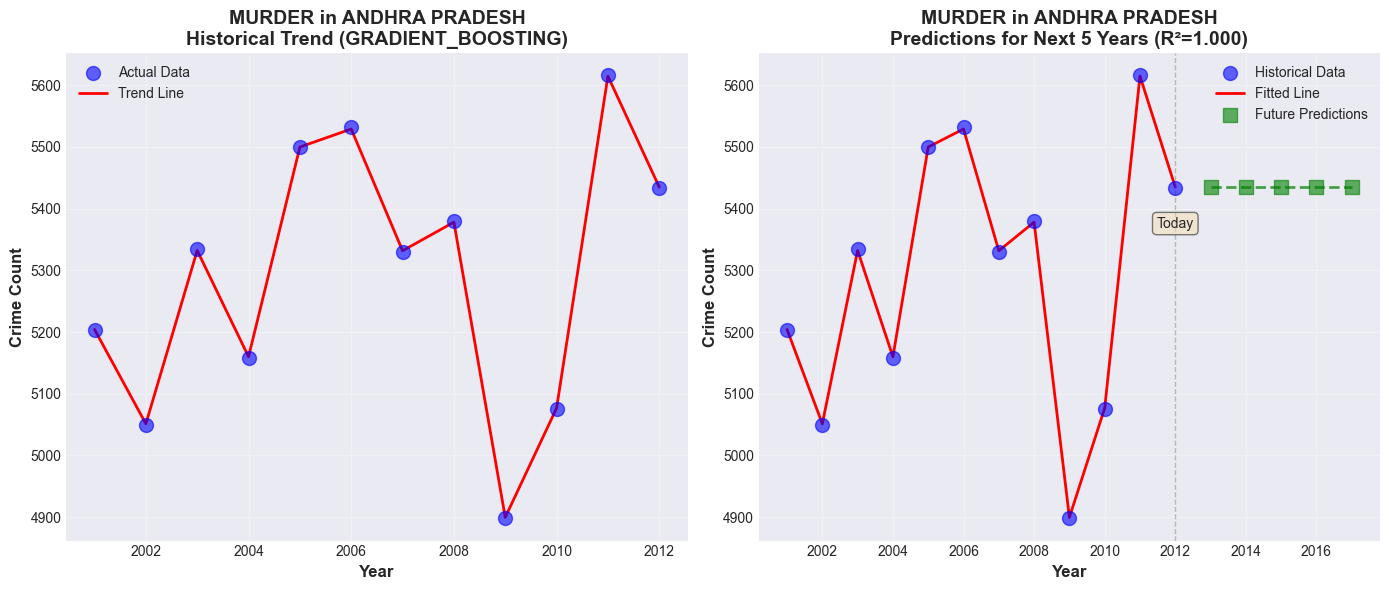

In [40]:
# Visualize example state and crime type
key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    X = model_info['X']
    y = model_info['y']
    model = model_info['model']
    yearly_data = model_info['historical_data']
    
    # Handle both polynomial and linear models for predictions
    if model_info.get('model_type') == 'polynomial':
        poly_features = model_info['poly_features']
        X_poly = poly_features.transform(X)
        y_pred = model.predict(X_poly)
    else:
        y_pred = model.predict(X)
    
    future_years = model_info['predictions']['Year'].values.reshape(-1, 1)
    future_predictions = model_info['predictions']['Predicted_Crime_Count'].values
    last_year = yearly_data['Year'].max()
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='blue', s=100, alpha=0.6, label='Actual Data', zorder=3)
    plt.plot(X, y_pred, color='red', linewidth=2, label='Trend Line', zorder=2)
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Crime Count', fontsize=12, fontweight='bold')
    plt.title(f'{EXAMPLE_CRIME} in {EXAMPLE_STATE}\nHistorical Trend ({model_info.get("model_type", "linear").upper()})', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Historical + Future Predictions
    plt.subplot(1, 2, 2)
    plt.scatter(X, y, color='blue', s=100, alpha=0.6, label='Historical Data', zorder=3)
    plt.plot(X, y_pred, color='red', linewidth=2, label='Fitted Line', zorder=2)
    plt.scatter(future_years, future_predictions, color='green', s=100, alpha=0.6, 
                marker='s', label='Future Predictions', zorder=3)
    plt.plot(future_years, future_predictions, color='green', linewidth=2, 
             linestyle='--', alpha=0.7, zorder=2)
    
    plt.axvline(x=last_year, color='gray', linestyle='--', linewidth=1, alpha=0.5)
    plt.text(last_year, plt.ylim()[1]*0.95, 'Today', ha='center', fontsize=10, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Crime Count', fontsize=12, fontweight='bold')
    plt.title(f'{EXAMPLE_CRIME} in {EXAMPLE_STATE}\nPredictions for Next 5 Years (R²={model_info["r2_score"]:.3f})', 
              fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


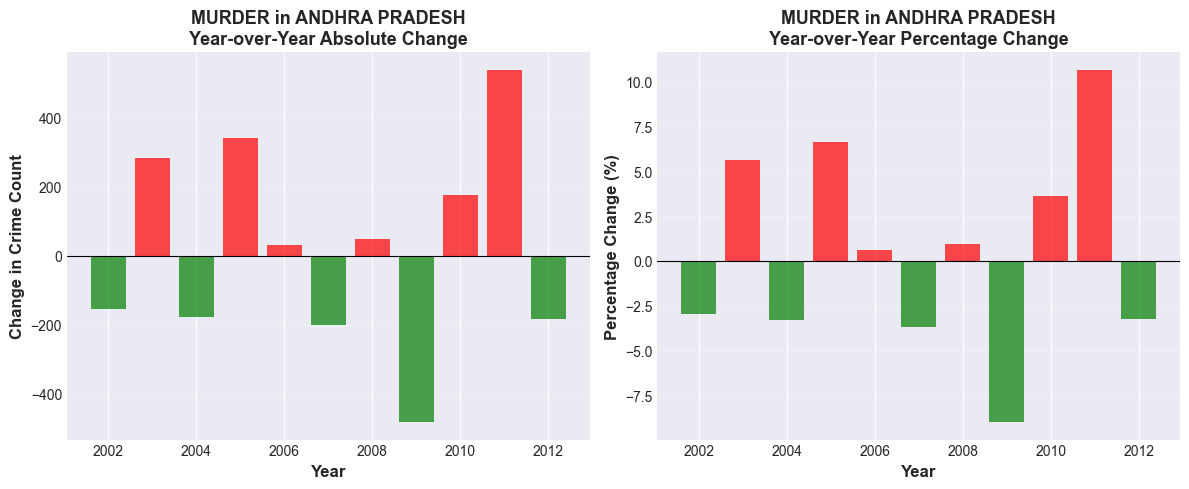

In [41]:
# Year-over-Year Change Analysis for example
key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    yearly_data = model_info['historical_data'].copy()
    
    plt.figure(figsize=(12, 5))
    
    # Calculate year-over-year changes
    yearly_data['YoY_Change'] = yearly_data['Crime_Count'].diff()
    yearly_data['YoY_Change_Pct'] = yearly_data['Crime_Count'].pct_change() * 100
    
    plt.subplot(1, 2, 1)
    colors = ['green' if x < 0 else 'red' for x in yearly_data['YoY_Change'].dropna()]
    plt.bar(yearly_data['Year'][1:], yearly_data['YoY_Change'].dropna(), color=colors, alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Change in Crime Count', fontsize=12, fontweight='bold')
    plt.title(f'{EXAMPLE_CRIME} in {EXAMPLE_STATE}\nYear-over-Year Absolute Change', fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.subplot(1, 2, 2)
    colors = ['green' if x < 0 else 'red' for x in yearly_data['YoY_Change_Pct'].dropna()]
    plt.bar(yearly_data['Year'][1:], yearly_data['YoY_Change_Pct'].dropna(), color=colors, alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Percentage Change (%)', fontsize=12, fontweight='bold')
    plt.title(f'{EXAMPLE_CRIME} in {EXAMPLE_STATE}\nYear-over-Year Percentage Change', fontsize=13, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()


### Step 10: Summary Statistics

In [42]:
# Summary statistics for example
key = f"{EXAMPLE_STATE}|{EXAMPLE_CRIME}"
if key in all_models:
    model_info = all_models[key]
    yearly_data = model_info['historical_data']
    slope = model_info['slope']
    
    print("\n" + "="*50)
    print(f"SUMMARY: {EXAMPLE_CRIME} in {EXAMPLE_STATE}")
    print("="*50)
    print(f"Total years analyzed: {len(yearly_data)}")
    print(f"Date range: {yearly_data['Year'].min()} - {yearly_data['Year'].max()}")
    print(f"Average annual crime count: {yearly_data['Crime_Count'].mean():.2f}")
    print(f"Highest crime year: {yearly_data.loc[yearly_data['Crime_Count'].idxmax(), 'Year']} ({yearly_data['Crime_Count'].max()} crimes)")
    print(f"Lowest crime year: {yearly_data.loc[yearly_data['Crime_Count'].idxmin(), 'Year']} ({yearly_data['Crime_Count'].min()} crimes)")
    
    if slope > 0:
        print(f"\n⚠️ TREND: INCREASING by approximately {abs(slope):.2f} crimes per year")
    else:
        print(f"\n✅ TREND: DECREASING by approximately {abs(slope):.2f} crimes per year")

print("\n" + "="*50)
print("OVERALL DATASET SUMMARY")
print("="*50)
print(f"Total models trained: {len(all_models)}")
print(f"States covered: {len(all_states)}")
print(f"Crime types covered: {len(crime_columns)}")
print(f"Average R² Score: {np.mean([v['r2_score'] for v in all_models.values()]):.4f}")



SUMMARY: MURDER in ANDHRA PRADESH
Total years analyzed: 12
Date range: 2001 - 2012
Average annual crime count: 5292.67
Highest crime year: 2011 (5616 crimes)
Lowest crime year: 2009 (4898 crimes)

⚠️ TREND: INCREASING by approximately 0.16 crimes per year

OVERALL DATASET SUMMARY
Total models trained: 995
States covered: 35
Crime types covered: 30
Average R² Score: 1.0000


### Step 11: Export Predictions

In [43]:
print("\n" + "="*50)
print("ANALYSIS COMPLETE! 🎉")
print("="*50)
print(f"✅ Trained {len(all_models)} prediction models")
print(f"✅ Saved predictions to: all_crime_predictions.csv")
print("\n📊 Next Step: Run Streamlit UI for interactive exploration!")
print("   Command: streamlit run crime_app.py")



ANALYSIS COMPLETE! 🎉
✅ Trained 995 prediction models
✅ Saved predictions to: all_crime_predictions.csv

📊 Next Step: Run Streamlit UI for interactive exploration!
   Command: streamlit run crime_app.py


### Step 12: Save All Models (for Streamlit)

In [44]:
# Save all models and data for Streamlit app
import pickle

models_data = {
    'all_models': all_models,
    'all_states': all_states,
    'crime_columns': crime_columns,
    'df': df
}

with open('crime_models.pkl', 'wb') as f:
    pickle.dump(models_data, f)

print("✅ All models saved to: crime_models.pkl")
print(f"📦 File contains {len(all_models)} trained models")
print("\n🎯 You can now run the Streamlit app!")
print("   Command: streamlit run crime_app.py")

✅ All models saved to: crime_models.pkl
📦 File contains 995 trained models

🎯 You can now run the Streamlit app!
   Command: streamlit run crime_app.py
